# 1. 데이터 불러오기

In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_excel(r'C:\Users\s\Desktop\해커톤/pets.xlsx')
df.head()

,유기번호,공고번호,접수일,공고시작일,공고종료일,프로필,품종,품종_대분류,품종_대분류_CODE(개/고양이/기타),품종_소분류,...,특징,특징_CODE(있음/없음),발견 장소,보호소 이름,보호소 전화번호,보호 장소,관할기관,관할기관_CODE,담당자,담당자 연락처
0,442420202000225,강원-강릉-2020-00237,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,개,1,[개]기타,...,"빨간색 목줄착용(새끼4마리 있음),심장사상충 감염",1.0,연곡 신욍리 은어향기,강릉시 동물보호소,033-641-7515,"강원도 강릉시 성산면 내맬길 172 (성산면, 유기동물보호소)",강원도 강릉시,1,함천식,033-640-5576
1,442434202000119,강원-고성-2020-00094,20200520,20200520,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,개,1,[개]기타,...,NaN,NaN,강원도 고성군 간성읍 간성로 39 간성초등학교 주변,고성군임시보호소,033-680-3723,강원도 고성군 간성읍 간성북로 87 (간성읍) 죽왕면 가진리 480번지(도로명주소 ...,강원도 고성군,2,이영민,033-680-3723
2,442421202000131,강원-동해-2020-00111,20200521,20200521,20200531,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,개,1,[개]기타,...,상태양호,1.0,동해시 천곡동 주공5차 502동 앞,동해시유기동물보호소,033-522-2990,"강원도 동해시 대동로 159-13 (송정동, 동해시유기동물보호소)",강원도 동해시,3,장석란,033-539-8834
3,442424202000220,강원-삼척-2020-00049,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 발바리,개,1,[개]기타,...,앞발기형,1.0,도계파출소,삼척시유기동물보호소,010-4373-1899,"강원도 삼척시 근덕면 교곡길 127-281 (근덕면, 쓰레기소각시설) 유기동물보호소",강원도 삼척시,4,삼척시,033-570-3863
4,442423202000172,강원-속초-2020-00150,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[고양이] 한국 고양이,고양이,2,[고양이]한국고양이,...,3개월미만 어린고양이,1.0,삼환아파트,속초시유기동물보호소,033-633-2519,강원도 속초시 하도문길 103 (대포동),강원도 속초시,5,최화진,033-639-2583


In [13]:
# 성별
# df.loc[조건, 열] = 값

df.loc[df['성별'] == 'M', '성별'] = 0
df.loc[df['성별'] == 'F', '성별'] = 1
df.loc[df['성별'] == 'Q', '성별'] = 2

# 품종
df.loc[df['품종'] == '개', '품종'] = 0 # 종류 하나하나 안 구하고 [개]라는 키워드로 품종 숫자 바꾸려면 어떻게 해야할까...?
df.loc[df['품종'] == '고양이', '품종'] = 1
df.loc[df['품종'] == '기타축종', '품종'] == 2

# 품종
df.loc[df['나이(출생년도)'] == '2019(년생)', '나이(출생년도)'] = 2019
df.loc[df['나이(출생년도)'] == '2020(년생)', '나이(출생년도)'] = 2020

# 중성화 여부
df.loc[df['중성화여부'] == 'N', '중성화여부'] = 0
df.loc[df['중성화여부'] == 'U', '중성화여부'] = 1

# 상태: 보호중인 동물 찾아내기
df.loc[df['상태'] == '종료(안락사)', '상태'] = 0
df.loc[df['상태'] == '종료(자연사)', '상태'] = 0
df.loc[df['상태'] == '보호중', '상태'] = 1
df.loc[df['상태'] == '종료(입양)', '상태'] = 2
df.loc[df['상태'] == '종료(반환)', '상태'] = 2

df

,유기번호,공고번호,접수일,공고시작일,공고종료일,프로필,품종,나이(출생년도),성별,중성화여부,...,상태,특징,특이사항,발견 장소,보호소 이름,보호소 전화번호,보호 장소,관할기관,담당자,담당자 연락처
0,446494202000207,전남-영암-2020-00205,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2019,0,0,...,1,"사람에 대해서 경계심이 강하고, 야간에 짖음이 심함",NaN,신북 영농조합,유기동물 삼호 보호소,010-9599-5400,전라남도 영암군 삼호읍 녹색로 1117-49 (삼호읍) 영암유기동물 삼호보호소,전라남도 영암군,영암군청,061-470-2163
1,446494202000206,전남-영암-2020-00204,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2019,0,0,...,1,"유기된 상태에서 4마리 새끼를 낳아서 분대를 이루며, 동네를 휩쓸고 다님",NaN,신북 영농조합,유기동물 삼호 보호소,010-9599-5400,전라남도 영암군 삼호읍 녹색로 1117-49 (삼호읍) 영암유기동물 삼호보호소,전라남도 영암군,영암군청,061-470-2163
2,446494202000205,전남-영암-2020-00203,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2019,1,0,...,0,모견과 함께 유기된 상태에 천방지축 동네를 돌면서 민원일으킴,NaN,신북 영농조합,유기동물 삼호 보호소,010-9599-5400,전라남도 영암군 삼호읍 녹색로 1117-49 (삼호읍) 영암유기동물 삼호보호소,전라남도 영암군,영암군청,061-470-2163
3,446494202000204,전남-영암-2020-00202,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2016(년생),1,0,...,0,"사람에 대해서 경계심이 강하고, 야간에 짖음이 심함",NaN,신북 영농조합,유기동물 삼호 보호소,010-9599-5400,전라남도 영암군 삼호읍 녹색로 1117-49 (삼호읍) 영암유기동물 삼호보호소,전라남도 영암군,영암군청,061-470-2163
4,446480202000407,전남-목포-2020-00409,20200521,20200522,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[고양이] 한국 고양이,2020,1,1,...,2,"길위에서 발견된 어린묘, 신고자가 진료후 제보,6주령추정",NaN,메디타워부근,목포시유기동물보호소,010-7466-1580,전라남도 무안군 삼향읍 석매길 36 (삼향읍),전라남도 목포시,축산계,061-270-8693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,450650202002732,제주-제주-2020-02674,20200519,20200520,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2020,0,0,...,0,(개체관리번호2567)생후3개월,NaN,서귀포시 성산 수시로22번길38,제주 동물보호센터,064-710-4065,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,제주동물보호센터,064-710-4065
24996,450650202002731,제주-제주-2020-02673,20200519,20200520,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2020,0,0,...,2,(개체관리번호2566)생후3개월,NaN,서귀포시 성산 수시로22번길38,제주 동물보호센터,064-710-4065,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,제주동물보호센터,064-710-4065
24997,450650202002730,제주-제주-2020-02672,20200519,20200520,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2020,0,0,...,2,(개체관리번호2565)생후3개월,NaN,서귀포시 성산 수시로22번길38,제주 동물보호센터,064-710-4065,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,제주동물보호센터,064-710-4065
24998,450650202002729,제주-제주-2020-02671,20200519,20200520,20200601,http://www.animal.go.kr/files/shelter/2020/04/...,[개] 믹스견,2020,1,0,...,0,(개체관리번호2564)생후3개월,NaN,서귀포시 성산 수시로22번길38,제주 동물보호센터,064-710-4065,제주특별자치도 제주시 첨단동길 184-14 (용강동),제주특별자치도,제주동물보호센터,064-710-4065


---
# 2. EDA & Feature Engineering

In [5]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [6]:
df.describe()

,유기번호,접수일,공고시작일,공고종료일
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04
mean,4.386374e+14,2.020052e+07,2.020052e+07,2.020060e+07
std,9.609272e+12,5.905023e-01,1.539120e+01,2.037622e+01
min,4.113002e+14,2.020052e+07,2.020052e+07,2.020053e+07
25%,4.293620e+14,2.020052e+07,2.020052e+07,2.020060e+07
50%,4.414142e+14,2.020052e+07,2.020052e+07,2.020060e+07
75%,4.454682e+14,2.020052e+07,2.020052e+07,2.020060e+07
max,4.506502e+14,2.020052e+07,2.020071e+07,2.020072e+07


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48121 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50577 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54413 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51117 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48708 missing from c

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48121 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44204 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 50577 missing from current fon

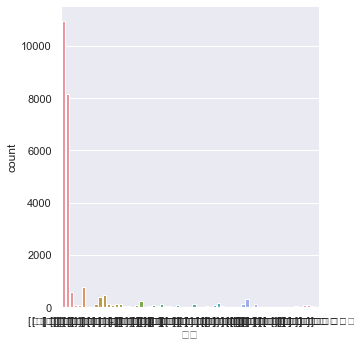

In [7]:
sns.catplot(data = df, x = '품종', kind = 'count')

---
# 3. Dataset 구성하기

In [8]:
input_data = df.drop('유기번호', '품종', '접수일')
target_data = df['품종']

print(input_data.shape, target_data.shape)

ValueError: Cannot specify both 'labels' and 'index'/'columns'

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2)

print(x_train.shape, x_test.shape)

---
# 4. 모델링 & 학습

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest.fit(x_train, y_train)